# Figures for external validation

Because I don't know how to use ggplot and have to do things in Python

In [7]:
import pandas as pd
import sys
import os
sys.path.append('../../code')
from style import set_style
from plotting import plot_regression_results
set_style('../../style.mplstyle')
import matplotlib.pyplot as plt

Font Heebo already available in Matplotlib.
Matplotlib style set to: ../../style.mplstyle with font Heebo


## Load regression summaries

In [8]:
predicted_scores = pd.read_csv('../../data/regressions/RouaultFactorReg_predictedScores.csv')
original_scores = pd.read_csv('../../data/regressions/RouaultFactorReg_originalScores.csv')

predicted_scores.head()

,Estimate,StdError,t value,Pr(>|t|),Label,Type
0,0.037646,0.053086,0.709148,0.478571,Accuracy,Anxious
1,0.034984,0.049397,0.708226,0.479142,Accuracy,Compulsivity
2,-0.081627,0.053415,-1.528151,0.127122,Accuracy,Social Withdrawal
3,-0.178995,0.051281,-3.490450,0.000526,Confidence Level,Anxious
4,0.192692,0.047718,4.038183,0.000063,Confidence Level,Compulsivity


In [9]:
# rename Pr(>|t|) in predicted scores to Pr...t..
predicted_scores = predicted_scores.rename(columns={'Pr(>|t|)': 'Pr...t..'})

# Drop "Label" values except those in original scores
predicted_scores = predicted_scores[predicted_scores['Label'].isin(original_scores['Label'])]

# Replace "Anxious" with "Anxious Depression" in the "Type" columns of both dataframes
predicted_scores = predicted_scores.replace({'Anxious': 'Anxious Depression'})
original_scores = original_scores.replace({'Anxious': 'Anxious Depression'})

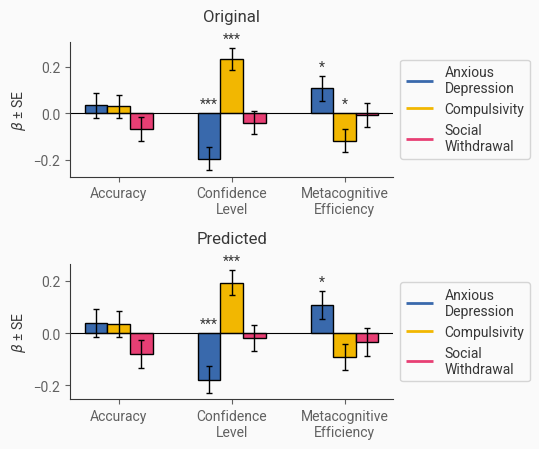

<Figure size 512x384 with 0 Axes>

In [10]:
plot_regression_results([original_scores, predicted_scores], titles=['Original', 'Predicted'])

# Save
plt.savefig('../../figures/regression_results.png', dpi=300, bbox_inches='tight')